In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [31]:
from Code import plot_physio

## Set Paths and Parameters

In [32]:
# ToDo: Adapt wave and problematic subject list
wave = 1

In [33]:
dir_path = os.getcwd()
dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
# ToDo: Adapt folder name
file_path = os.path.join(dir_path, f'Data-Wave{wave}')

In [34]:
SA_score="SPAI"

In [35]:
df_scores = pd.read_csv(os.path.join(file_path, 'scores_summary.csv'), decimal='.', sep=';')
df_scores = df_scores.loc[~df_scores['exclude']]
median = df_scores[SA_score].median()

## Physiology

In [36]:
save_path = os.path.join(dir_path, f'Plots-Wave{wave}', 'Physiology')
if not os.path.exists(save_path):
    print('creating path for saving')
    os.makedirs(save_path)

In [37]:
for physiology in ("hr", "eda"):
    df = pd.read_csv(os.path.join(file_path, f'{physiology}.csv'), decimal='.', sep=';')
    df = df.loc[~(df["Phase"].str.contains("Interaction") | df["Phase"].str.contains("Clicked") | df["Phase"].str.contains("resting") | df["Phase"].str.contains("Visible"))]
    df.loc[df["Phase"].str.contains("Orientation"), "phase"] = "Orientation"
    df.loc[df["Phase"].str.contains("Habituation"), "phase"] = "Habituation"
    df.loc[df["Phase"].str.contains("Test"), "phase"] = "Test"

    df_grouped = df.groupby(["VP", "phase"]).sum(numeric_only=True).reset_index()
    df_grouped.loc[df_grouped["phase"].str.contains("Orientation"), "total_duration"] = 30
    df_grouped.loc[df_grouped["phase"].str.contains("Habituation"), "total_duration"] = 180
    df_grouped.loc[df_grouped["phase"].str.contains("Test"), "total_duration"] = 180
    df_grouped["prop_duration"] = df_grouped["Duration"]/df_grouped["total_duration"]
    df_grouped.loc[df_grouped["prop_duration"] > 1, "prop_duration"] = 1

    df_grouped = df_grouped.groupby(["VP"]).mean(numeric_only=True).reset_index()

    df_check = df_grouped.loc[df_grouped["prop_duration"] >= .75]
    print(f"Participants included for {physiology}-analysis: {len(df_check['VP'].unique())}, "
          f"remaining participants had {round(df_check['prop_duration'].mean() * 100, 2)}% (SD={round(df_check['prop_duration'].std() * 100, 2)}%) usable data")


Participants included for hr-analysis: 42, remaining participants had 99.81% (SD=0.92%) usable data
Participants included for eda-analysis: 41, remaining participants had 98.74% (SD=3.75%) usable data


HR: N = 42


100%|██████████| 1000/1000 [06:52<00:00,  2.42it/s]


boundary (singular) fit: see help('isSingular') 
boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Physio Test (Condition, Phase and SPAI)
Condition Main Effect, F(1, 916.0)=2.28, p=0.132, p_eta_2=0.0
SPAI Main Effect, F(1, 916.0)=3.36, p=0.067, p_eta_2=0.0
Interaction Condition x SPAI, F(1, 916.0)=17.03, p=0.0, p_eta_2=0.02
P-values adjusted by holm method for 1 comparisons
EDA: N = 41


100%|██████████| 1000/1000 [06:39<00:00,  2.50it/s]


SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Physio Test (Condition, Phase and SPAI)
Condition Main Effect, F(1, 489.2)=0.71, p=0.398, p_eta_2=0.0
SPAI Main Effect, F(1, 42.5)=0.0, p=0.949, p_eta_2=0.0
Interaction Condition x SPAI, F(1, 491.7)=0.33, p=0.568, p_eta_2=0.0
P-values adjusted by holm method for 1 comparisons
PUPIL: N = 48


100%|██████████| 1000/1000 [06:49<00:00,  2.44it/s]


SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Physio Test (Condition, Phase and SPAI)
Condition Main Effect, F(1, 981.4)=0.3, p=0.587, p_eta_2=0.0
SPAI Main Effect, F(1, 76.6)=0.2, p=0.654, p_eta_2=0.0
Interaction Condition x SPAI, F(1, 983.3)=0.07, p=0.795, p_eta_2=0.0
P-values adjusted by holm method for 1 comparisons


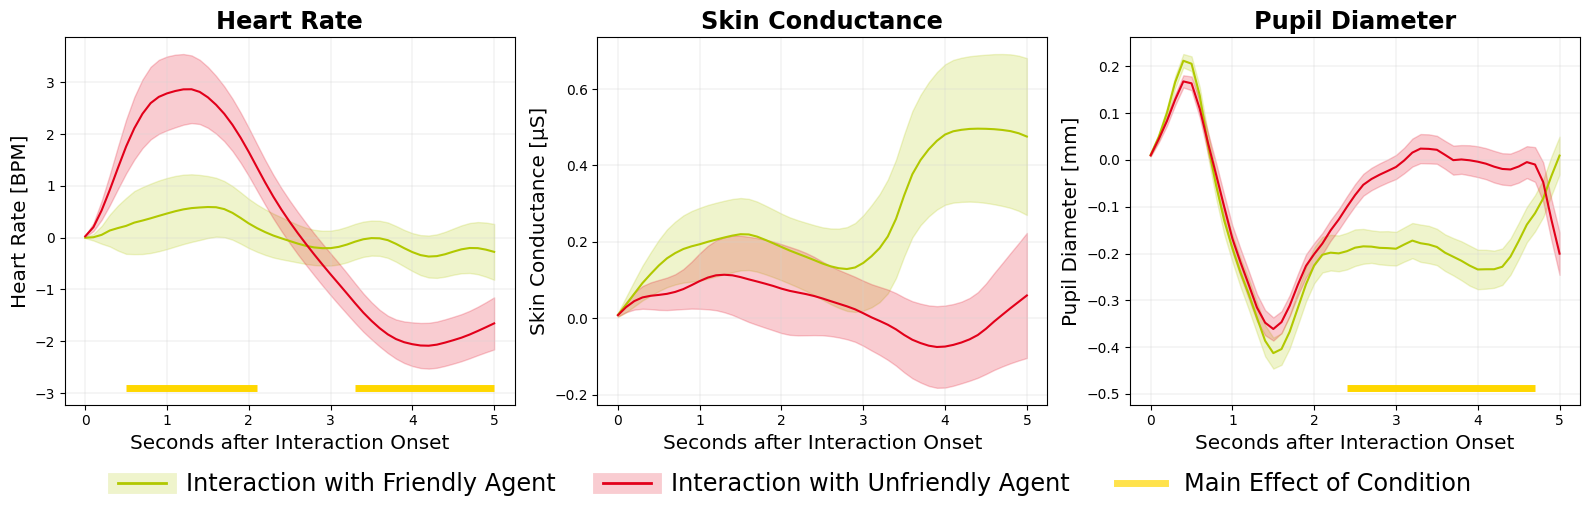

In [38]:
plot_physio.plot_physio_acq(file_path, save_path, test="F", SA_score="SPAI", permutations=1000)
plt.savefig(os.path.join(save_path, f"physiology_acq.png"), dpi=300)

HR: N = 42
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Physio (hr) Test (Condition and SPAI)
Condition Main Effect, F(2, 78.2)=1.95, p=0.15, p_eta_2=0.05
SPAI Main Effect, F(1, 40.3)=0.57, p=0.455, p_eta_2=0.01
Interaction Condition x SPAI, F(2, 78.4)=1.62, p=0.204, p_eta_2=0.04
P-values adjusted by holm method for 3 comparisons
EDA: N = 41
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Physio (eda) Test (Condition and SPAI)
Condition Main Effect, F(2, 76.1)=3.49, p=0.035, p_eta_2

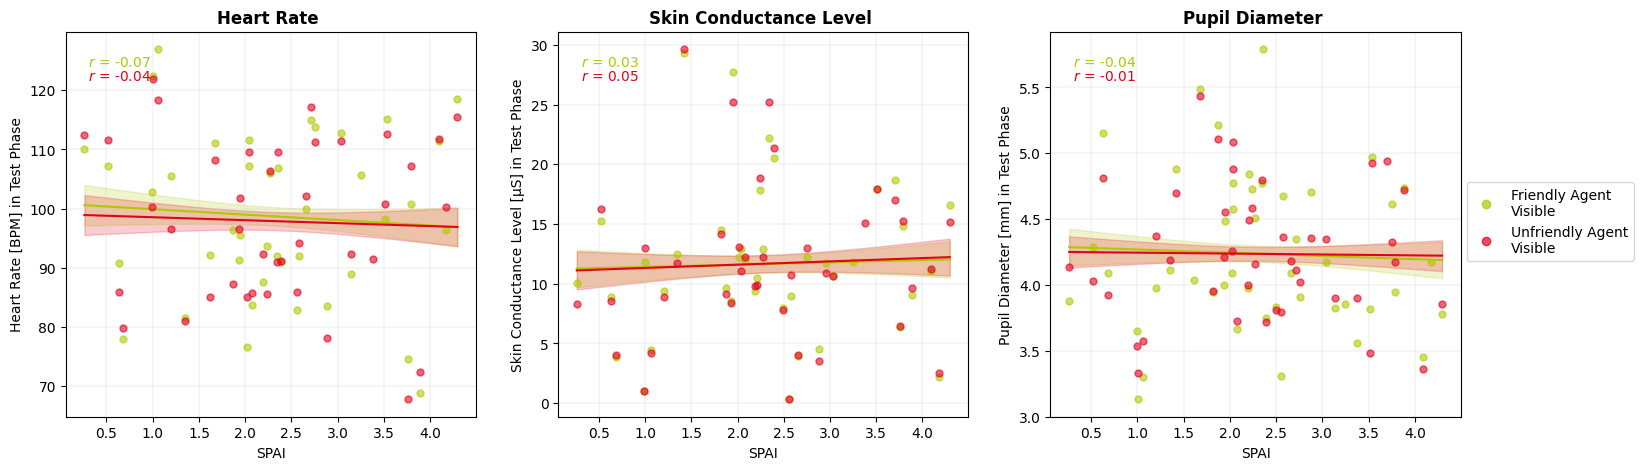

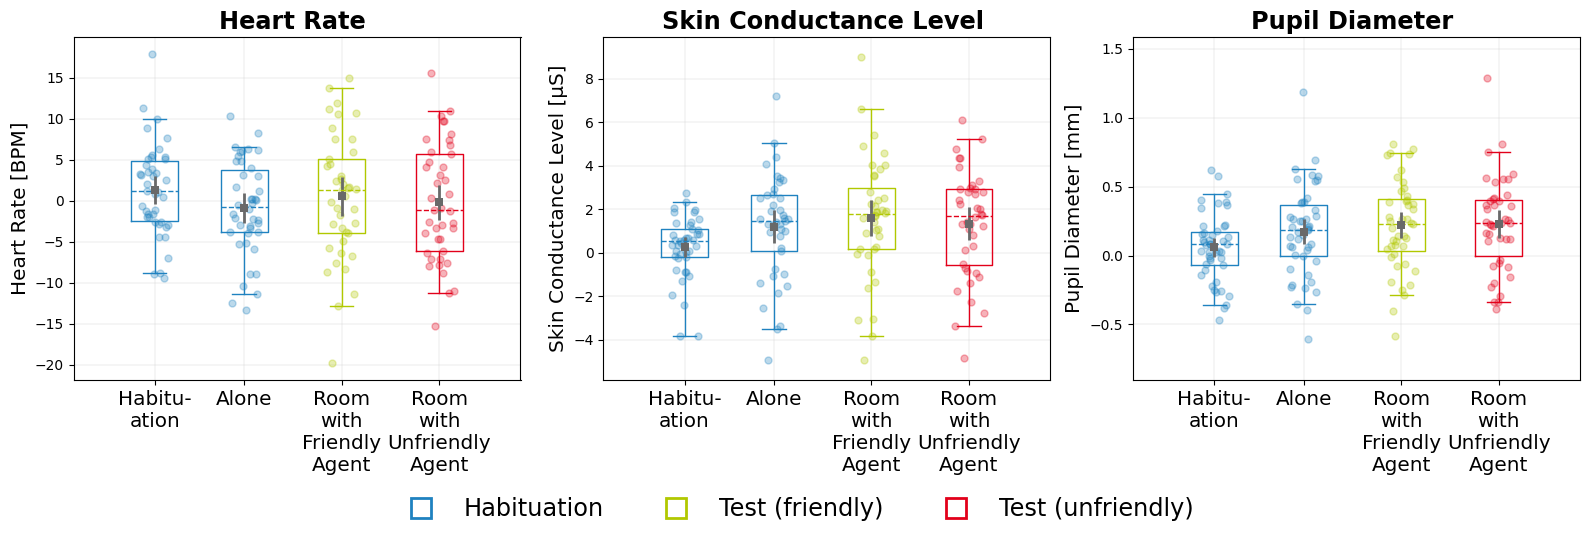

In [39]:
SA_score = "SPAI"
plot_physio.plot_physio_test_sad(file_path, SA_score)
plt.savefig(os.path.join(save_path, f"physiology_test_{SA_score}.png"), dpi=300, bbox_inches="tight")

if wave == 1:
    plot_physio.plot_physio_diff(file_path, save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"physiology_hab-test.png"), dpi=300, bbox_inches="tight")

    #plot_physio.plot_physio_diff_sad(file_path, SA_score)
    #plt.savefig(os.path.join(save_path, f"physiology_hab-test_{SA_score}.png"), dpi=300,bbox_inches="tight")
    
elif wave == 2:
    # plot_physio.plot_physio_diff(file_path, save_path, SA_score, visibility=True)
    # plt.savefig(os.path.join(save_path, f"physiology_hab-test_vis.png"), dpi=300, bbox_inches="tight")
    
    plot_physio.plot_physio_diff(file_path, save_path, SA_score, visibility=False)
    plt.savefig(os.path.join(save_path, f"physiology_hab-test_rooms.png"), dpi=300, bbox_inches="tight")
    
# plot_physio.plot_physio_phase_sad(file_path, SA_score)
# plt.savefig(os.path.join(save_path, f"physiology_phases.png"), dpi=300, bbox_inches="tight")